In [20]:
import pandas  as pd
excel_file_path='TCP_datasets1.xlsx'
df=pd.read_excel(excel_file_path)
df.head(2)

,Perovskite,structure,bandgap,glass,ETL,ETL-2,Ethickness,HTL,Hthickness,meta,...,Voc,FF,PCE,Article,Cs,FA,MA,Pb,I,Br
0,FA0.45MA0.49Cs0.06PbI1.86Br0.96Cl0.18,1,1.8,FTO,SnO2,NaN,NaN,spiro,NaN,C,...,1.05,0.49,7.2,"Penpong, K., Seriwatanachai, C., Naikaew, A. e...",0.06,0.45,0.49,1.0,1.86,0.96
1,FA0.45MA0.49Cs0.06PbI1.86Br0.96Cl0.18,1,1.8,FTO,SnO2,NaN,NaN,spiro,NaN,C,...,0.96,0.4,5.4,"Penpong, K., Seriwatanachai, C., Naikaew, A. e...",0.06,0.45,0.49,1.0,1.86,0.96


In [21]:
df.shape

(460, 27)

In [22]:
df.isnull().sum()

Perovskite                0
structure                 0
bandgap                  11
glass                    16
ETL                      16
ETL-2                   229
Ethickness              420
HTL                      28
Hthickness              427
meta                     17
depositionProcedure      32
depositionMethod         32
Anti-solvent            122
PrecursorSolution        33
AnnealingTemperature     38
AnnealingTime            38
Jsc                       3
Voc                       3
FF                        4
PCE                       1
Article                  20
Cs                        0
FA                        0
MA                        0
Pb                        0
I                         0
Br                        0
dtype: int64

In [23]:
df = df.dropna(subset=['PCE'])
df.shape

(459, 27)

In [26]:
df['Jsc'] = df['Jsc'].replace('21,86', '21.86', regex=True)

## #使用KNNImputer填充数据集

In [27]:
import numpy as np
import os
from sklearn.impute import KNNImputer
from category_encoders import TargetEncoder
import pickle
missDataCols=['bandgap','Ethickness','Hthickness','AnnealingTemperature','AnnealingTime','Jsc','Voc','FF']

imputer = KNNImputer(n_neighbors=5) # Imputer will fill missing values using 5 neighboring data
df_new = df.copy() # Copy of the dataset
df_new[missDataCols] = imputer.fit_transform(df_new[missDataCols]) # Imputation

In [28]:
df_new.head(3)

,Perovskite,structure,bandgap,glass,ETL,ETL-2,Ethickness,HTL,Hthickness,meta,...,Voc,FF,PCE,Article,Cs,FA,MA,Pb,I,Br
0,FA0.45MA0.49Cs0.06PbI1.86Br0.96Cl0.18,1,1.8,FTO,SnO2,NaN,21.2,spiro,94.0034,C,...,1.05,0.49,7.2,"Penpong, K., Seriwatanachai, C., Naikaew, A. e...",0.06,0.45,0.49,1.0,1.86,0.96
1,FA0.45MA0.49Cs0.06PbI1.86Br0.96Cl0.18,1,1.8,FTO,SnO2,NaN,21.2,spiro,94.0034,C,...,0.96,0.40,5.4,"Penpong, K., Seriwatanachai, C., Naikaew, A. e...",0.06,0.45,0.49,1.0,1.86,0.96
2,FA0.45MA0.49Cs0.06PbI1.86Br0.96Cl0.18,1,1.8,FTO,SnO2,NaN,21.2,spiro,94.0034,C,...,1.05,0.51,8.6,"Penpong, K., Seriwatanachai, C., Naikaew, A. e...",0.06,0.45,0.49,1.0,1.86,0.96


In [30]:
column_names = df_new.columns.tolist()
new_column_order = column_names[20:] + column_names[:20] 
df_new = df_new[new_column_order]
output_excel_file_path = 'editedDatasets.xlsx'
df_new.to_excel(output_excel_file_path, index=False)

In [32]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 459 entries, 0 to 459
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Article               440 non-null    object 
 1   Cs                    459 non-null    float64
 2   FA                    459 non-null    float64
 3   MA                    459 non-null    float64
 4   Pb                    459 non-null    float64
 5   I                     459 non-null    float64
 6   Br                    459 non-null    float64
 7   Perovskite            459 non-null    object 
 8   structure             459 non-null    int64  
 9   bandgap               459 non-null    float64
 10  glass                 444 non-null    object 
 11  ETL                   444 non-null    object 
 12  ETL-2                 231 non-null    object 
 13  Ethickness            459 non-null    float64
 14  HTL                   432 non-null    object 
 15  Hthickness            4

In [36]:
df_new = df_new.drop('Article', axis=1)
df_new = df_new.drop('Perovskite', axis=1)
df_new = df_new.drop('Pb', axis=1)

KeyError: "['Article'] not found in axis"

In [38]:
df_new = df_new.fillna('unknown')

In [40]:
df_new.to_csv("Edited_knn_imputed.csv",index=False)

## 数据encoding

In [41]:
df = pd.read_csv('Edited_knn_imputed.csv') # Loading imputed data
df = df.sample(frac=1, random_state=0).reset_index(drop=True) # Shuffling data
df.to_csv('Edited_knn_imputed.csv',index=False) # Saving data
df.head()


,Cs,FA,MA,I,Br,structure,bandgap,glass,ETL,ETL-2,...,depositionProcedure,depositionMethod,Anti-solvent,PrecursorSolution,AnnealingTemperature,AnnealingTime,Jsc,Voc,FF,PCE
0,0.20,0.664,0.136,2.490,0.510,1,1.675930,FTO,c-TiO2,mp-TiO2,...,two-step,spin,CB,DMF/DMSO,100.0,60.0,20.80,1.090,0.7400,16.8
1,0.00,0.976,0.024,2.928,0.072,1,1.547258,ITO,SnO2,unknown,...,two-step,spin,unknown,DMF/DMSO,150.0,20.0,24.03,1.090,0.6801,18.59
2,0.10,0.000,0.900,3.000,0.000,0,1.540000,ITO,PCBM,unknown,...,one-step,spin,toluene,GBL/DMF,110.0,10.0,10.10,1.050,0.7300,7.68
3,0.05,0.850,0.150,2.550,0.450,1,1.694770,FTO,Bi-SnO2,unknown,...,two-step,spin,EA/HEX,DMF/DMSO,150.0,20.0,23.18,1.118,0.7627,18.49
4,0.10,0.747,0.153,2.490,0.510,1,1.564770,ITO,SnO2,unknown,...,two-step,spin,CB,DMF/DMSO,100.0,60.0,23.79,0.984,0.8180,19.15


In [51]:
df['PCE'] = df['PCE'].astype('float64')

In [52]:


# Select feature list and target variable
X = df.iloc[:,0:-4] 
y = df.iloc[:,-4:]  
print(f"Shape of X: {str(X.shape)}\nShape of y: {str(y.shape)}")

Shape of X: (459, 20)
Shape of y: (459, 4)


In [53]:
print(X.dtypes)
print("################################################################################")
print(y.dtypes)

Cs                      float64
FA                      float64
MA                      float64
I                       float64
Br                      float64
structure                 int64
bandgap                 float64
glass                    object
ETL                      object
ETL-2                    object
Ethickness              float64
HTL                      object
Hthickness              float64
meta                     object
depositionProcedure      object
depositionMethod         object
Anti-solvent             object
PrecursorSolution        object
AnnealingTemperature    float64
AnnealingTime           float64
dtype: object
################################################################################
Jsc    float64
Voc    float64
FF     float64
PCE    float64
dtype: object


In [50]:
print(y.dtypes)

Jsc    float64
Voc    float64
FF     float64
PCE     object
dtype: object


In [54]:
numerical = list(X.select_dtypes(include='float64')) 
categorical = list(X.select_dtypes(include='object'))
integer = list(X.select_dtypes(include='int64'))
print("No. of Numerical Features = "+str(len(numerical)))
print("No. of Categorical Features = "+str(len(categorical)))
print("No. of integer Features = "+str(len(integer)))

No. of Numerical Features = 10
No. of Categorical Features = 9
No. of integer Features = 1


In [55]:
X[categorical] = X[categorical].astype('category')

In [56]:
# Printing No. of Unique labels on each feature
print("Columns: No. of unique labels")
for c in categorical:
    print(c+": "+str(len(X[c].unique())))

Columns: No. of unique labels
glass: 6
ETL: 36
ETL-2: 14
HTL: 51
meta: 12
depositionProcedure: 6
depositionMethod: 8
Anti-solvent: 21
PrecursorSolution: 48


In [59]:
X_Jsc, X_Voc, X_FF, X_PCE = X.copy(), X.copy(), X.copy(), X.copy() 
y_Jsc, y_Voc, y_FF, y_PCE = y['Jsc'], y['Voc'], y['FF'], y['PCE'] 

## 目标encoding

### PCE  encoding

In [60]:
TE_PCE = TargetEncoder() 
TE_PCE.fit(X_PCE[categorical],y_PCE) 
X_PCE[categorical] = TE_PCE.transform(X_PCE[categorical]) 
pickle.dump(TE_PCE, open("TE_enc.pkl","wb")) 

In [61]:
X_PCE.head()

,Cs,FA,MA,I,Br,structure,bandgap,glass,ETL,ETL-2,Ethickness,HTL,Hthickness,meta,depositionProcedure,depositionMethod,Anti-solvent,PrecursorSolution,AnnealingTemperature,AnnealingTime
0,0.20,0.664,0.136,2.490,0.510,1,1.675930,13.748589,13.488258,13.383332,32.8,14.509819,150.22,14.127792,15.043191,14.540729,14.234280,14.001019,100.0,60.0
1,0.00,0.976,0.024,2.928,0.072,1,1.547258,15.131266,15.569879,14.720934,28.0,14.509819,172.00,15.271362,15.043191,14.540729,14.993971,14.001019,150.0,20.0
2,0.10,0.000,0.900,3.000,0.000,0,1.540000,15.131266,11.770393,14.720934,22.0,11.599998,205.00,12.108967,13.387364,14.540729,11.813466,11.742800,110.0,10.0
3,0.05,0.850,0.150,2.550,0.450,1,1.694770,13.748589,15.009397,14.720934,28.0,14.509819,172.00,15.271362,15.043191,14.540729,14.864565,14.001019,150.0,20.0
4,0.10,0.747,0.153,2.490,0.510,1,1.564770,15.131266,15.569879,14.720934,72.6,14.509819,200.62,14.127792,15.043191,14.540729,14.234280,14.001019,100.0,60.0


In [67]:
df_encoded_PCE = pd.concat([X_PCE,y],axis=1) 
df_encoded_PCE.head()

,Cs,FA,MA,I,Br,structure,bandgap,glass,ETL,ETL-2,...,depositionProcedure,depositionMethod,Anti-solvent,PrecursorSolution,AnnealingTemperature,AnnealingTime,Jsc,Voc,FF,PCE
0,0.20,0.664,0.136,2.490,0.510,1,1.675930,13.748589,13.488258,13.383332,...,15.043191,14.540729,14.234280,14.001019,100.0,60.0,20.80,1.090,0.7400,16.80
1,0.00,0.976,0.024,2.928,0.072,1,1.547258,15.131266,15.569879,14.720934,...,15.043191,14.540729,14.993971,14.001019,150.0,20.0,24.03,1.090,0.6801,18.59
2,0.10,0.000,0.900,3.000,0.000,0,1.540000,15.131266,11.770393,14.720934,...,13.387364,14.540729,11.813466,11.742800,110.0,10.0,10.10,1.050,0.7300,7.68
3,0.05,0.850,0.150,2.550,0.450,1,1.694770,13.748589,15.009397,14.720934,...,15.043191,14.540729,14.864565,14.001019,150.0,20.0,23.18,1.118,0.7627,18.49
4,0.10,0.747,0.153,2.490,0.510,1,1.564770,15.131266,15.569879,14.720934,...,15.043191,14.540729,14.234280,14.001019,100.0,60.0,23.79,0.984,0.8180,19.15


In [68]:
df_encoded_PCE.to_csv("Target_Encoding/df_encoded_PCE.csv",index=False) 

### Jsc    Encoding

In [70]:
TE_Jsc = TargetEncoder() 
TE_Jsc.fit(X_Jsc[categorical],y_Jsc) 
X_Jsc[categorical] = TE_Jsc.transform(X_Jsc[categorical]) 

In [71]:
X_Jsc.head()

,Cs,FA,MA,I,Br,structure,bandgap,glass,ETL,ETL-2,Ethickness,HTL,Hthickness,meta,depositionProcedure,depositionMethod,Anti-solvent,PrecursorSolution,AnnealingTemperature,AnnealingTime
0,0.20,0.664,0.136,2.490,0.510,1,1.675930,17.589778,18.351530,17.984399,32.8,18.469210,150.22,18.875312,19.486128,18.420975,18.834494,17.764383,100.0,60.0
1,0.00,0.976,0.024,2.928,0.072,1,1.547258,18.859552,17.473672,19.537855,28.0,18.469210,172.00,17.144971,19.486128,18.420975,16.603794,17.764383,150.0,20.0
2,0.10,0.000,0.900,3.000,0.000,0,1.540000,18.859552,12.805939,19.537855,22.0,15.836721,205.00,16.168799,18.514110,18.420975,16.004236,14.970278,110.0,10.0
3,0.05,0.850,0.150,2.550,0.450,1,1.694770,17.589778,18.864635,19.537855,28.0,18.469210,172.00,17.144971,19.486128,18.420975,18.661800,17.764383,150.0,20.0
4,0.10,0.747,0.153,2.490,0.510,1,1.564770,18.859552,17.473672,19.537855,72.6,18.469210,200.62,18.875312,19.486128,18.420975,18.834494,17.764383,100.0,60.0


In [72]:
df_encoded_Jsc = pd.concat([X_Jsc,y],axis=1) 
df_encoded_Jsc.head()

,Cs,FA,MA,I,Br,structure,bandgap,glass,ETL,ETL-2,...,depositionProcedure,depositionMethod,Anti-solvent,PrecursorSolution,AnnealingTemperature,AnnealingTime,Jsc,Voc,FF,PCE
0,0.20,0.664,0.136,2.490,0.510,1,1.675930,17.589778,18.351530,17.984399,...,19.486128,18.420975,18.834494,17.764383,100.0,60.0,20.80,1.090,0.7400,16.80
1,0.00,0.976,0.024,2.928,0.072,1,1.547258,18.859552,17.473672,19.537855,...,19.486128,18.420975,16.603794,17.764383,150.0,20.0,24.03,1.090,0.6801,18.59
2,0.10,0.000,0.900,3.000,0.000,0,1.540000,18.859552,12.805939,19.537855,...,18.514110,18.420975,16.004236,14.970278,110.0,10.0,10.10,1.050,0.7300,7.68
3,0.05,0.850,0.150,2.550,0.450,1,1.694770,17.589778,18.864635,19.537855,...,19.486128,18.420975,18.661800,17.764383,150.0,20.0,23.18,1.118,0.7627,18.49
4,0.10,0.747,0.153,2.490,0.510,1,1.564770,18.859552,17.473672,19.537855,...,19.486128,18.420975,18.834494,17.764383,100.0,60.0,23.79,0.984,0.8180,19.15


In [73]:
df_encoded_PCE.to_csv("Target_Encoding/df_encoded_Jsc.csv",index=False) 

### Voc Encoding

In [74]:
TE_Voc = TargetEncoder() 
TE_Voc.fit(X_Voc[categorical],y_Voc) 
X_Voc[categorical] = TE_Voc.transform(X_Voc[categorical]) 

In [75]:
X_Voc.head()

,Cs,FA,MA,I,Br,structure,bandgap,glass,ETL,ETL-2,Ethickness,HTL,Hthickness,meta,depositionProcedure,depositionMethod,Anti-solvent,PrecursorSolution,AnnealingTemperature,AnnealingTime
0,0.20,0.664,0.136,2.490,0.510,1,1.675930,2.356981,1.060521,1.068945,32.8,1.935725,150.22,1.109588,1.079317,1.957554,1.225932,2.379821,100.0,60.0
1,0.00,0.976,0.024,2.928,0.072,1,1.547258,1.773893,3.976406,1.108209,28.0,1.935725,172.00,4.282948,1.079317,1.957554,4.310259,2.379821,150.0,20.0
2,0.10,0.000,0.900,3.000,0.000,0,1.540000,1.773893,4.422018,1.108209,22.0,1.539548,205.00,1.579751,1.519265,1.957554,1.675993,1.790197,110.0,10.0
3,0.05,0.850,0.150,2.550,0.450,1,1.694770,2.356981,1.941201,1.108209,28.0,1.935725,172.00,4.282948,1.079317,1.957554,1.881183,2.379821,150.0,20.0
4,0.10,0.747,0.153,2.490,0.510,1,1.564770,1.773893,3.976406,1.108209,72.6,1.935725,200.62,1.109588,1.079317,1.957554,1.225932,2.379821,100.0,60.0


In [76]:
df_encoded_Voc = pd.concat([X_Voc,y],axis=1) 
df_encoded_Voc.head()

,Cs,FA,MA,I,Br,structure,bandgap,glass,ETL,ETL-2,...,depositionProcedure,depositionMethod,Anti-solvent,PrecursorSolution,AnnealingTemperature,AnnealingTime,Jsc,Voc,FF,PCE
0,0.20,0.664,0.136,2.490,0.510,1,1.675930,2.356981,1.060521,1.068945,...,1.079317,1.957554,1.225932,2.379821,100.0,60.0,20.80,1.090,0.7400,16.80
1,0.00,0.976,0.024,2.928,0.072,1,1.547258,1.773893,3.976406,1.108209,...,1.079317,1.957554,4.310259,2.379821,150.0,20.0,24.03,1.090,0.6801,18.59
2,0.10,0.000,0.900,3.000,0.000,0,1.540000,1.773893,4.422018,1.108209,...,1.519265,1.957554,1.675993,1.790197,110.0,10.0,10.10,1.050,0.7300,7.68
3,0.05,0.850,0.150,2.550,0.450,1,1.694770,2.356981,1.941201,1.108209,...,1.079317,1.957554,1.881183,2.379821,150.0,20.0,23.18,1.118,0.7627,18.49
4,0.10,0.747,0.153,2.490,0.510,1,1.564770,1.773893,3.976406,1.108209,...,1.079317,1.957554,1.225932,2.379821,100.0,60.0,23.79,0.984,0.8180,19.15


In [77]:
df_encoded_PCE.to_csv("Target_Encoding/df_encoded_Voc.csv",index=False) 

### FF encoding

In [78]:
TE_FF = TargetEncoder() 
TE_FF.fit(X_FF[categorical],y_FF) 
X_FF[categorical] = TE_FF.transform(X_FF[categorical])

In [79]:
X_FF.head()

,Cs,FA,MA,I,Br,structure,bandgap,glass,ETL,ETL-2,Ethickness,HTL,Hthickness,meta,depositionProcedure,depositionMethod,Anti-solvent,PrecursorSolution,AnnealingTemperature,AnnealingTime
0,0.20,0.664,0.136,2.490,0.510,1,1.675930,0.675649,0.687113,0.691790,32.8,0.962179,150.22,0.998250,1.000584,0.88515,0.977271,0.914892,100.0,60.0
1,0.00,0.976,0.024,2.928,0.072,1,1.547258,1.105580,1.608708,1.108347,28.0,0.962179,172.00,0.706671,1.000584,0.88515,0.885257,0.914892,150.0,20.0
2,0.10,0.000,0.900,3.000,0.000,0,1.540000,1.105580,0.710907,1.108347,22.0,0.774691,205.00,0.786354,0.662241,0.88515,0.701763,0.830217,110.0,10.0
3,0.05,0.850,0.150,2.550,0.450,1,1.694770,0.675649,0.887451,1.108347,28.0,0.962179,172.00,0.706671,1.000584,0.88515,0.872394,0.914892,150.0,20.0
4,0.10,0.747,0.153,2.490,0.510,1,1.564770,1.105580,1.608708,1.108347,72.6,0.962179,200.62,0.998250,1.000584,0.88515,0.977271,0.914892,100.0,60.0


In [ ]:
df_encoded_FF = pd.concat([X_FF,y],axis=1) # Joining FF column with encoded dataset
df_encoded_FF.head()

In [80]:
df_encoded_PCE.to_csv("Target_Encoding/df_encoded_FF.csv",index=False) 

## data distrubution

In [83]:
dfff=pd.read_csv("Target_Encoding/df_encoded_FF.csv")
dfff.isnull().sum()

Cs                      0
FA                      0
MA                      0
I                       0
Br                      0
structure               0
bandgap                 0
glass                   0
ETL                     0
ETL-2                   0
Ethickness              0
HTL                     0
Hthickness              0
meta                    0
depositionProcedure     0
depositionMethod        0
Anti-solvent            0
PrecursorSolution       0
AnnealingTemperature    0
AnnealingTime           0
Jsc                     0
Voc                     0
FF                      0
PCE                     0
dtype: int64

### 偏相关系数矩阵

In [84]:

df.shape

(459, 24)

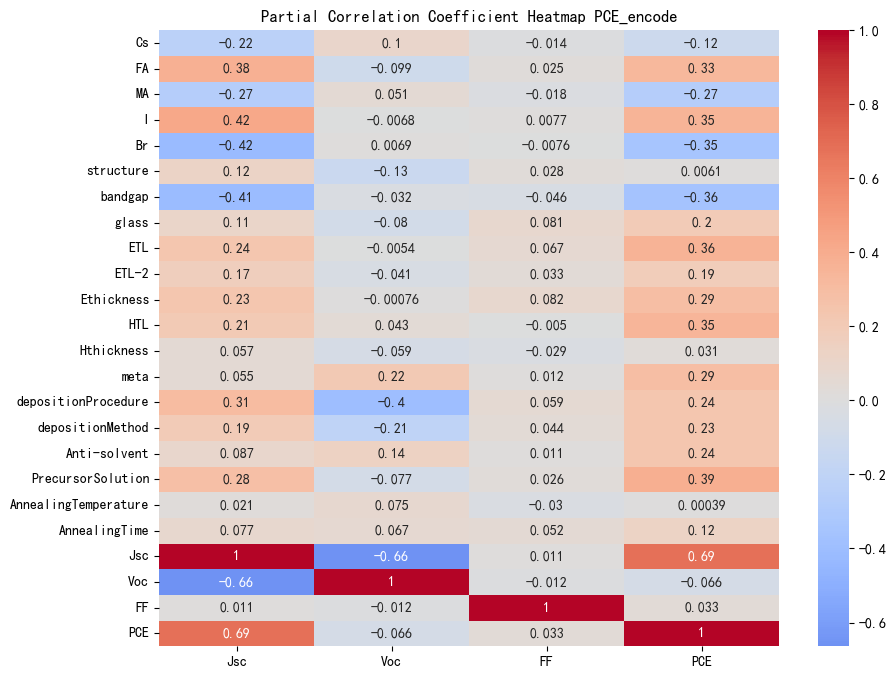

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号
import pingouin as pg

df=pd.read_csv("Target_Encoding\df_encoded_PCE.csv")

df_pcorr = df.corr(method='pearson')
df_pcorr_last4 = df_pcorr.iloc[:, -4:]

plt.figure(figsize=(10, 8))
sns.heatmap(df_pcorr_last4, annot=True, cmap='coolwarm', center=0)
plt.title('Partial Correlation Coefficient Heatmap PCE_encode')
plt.show()



In [99]:
dfe=df.to_excel("PCE-encoded.xlsx")
pd.read_csv("Edited_knn_imputed.csv").to_excel("Edited_knn_imputed.xlsx")

In [101]:
data=pd.read_csv("Target_Encoding\df_encoded_PCE.csv")
data.dtypes

Cs                      float64
FA                      float64
MA                      float64
I                       float64
Br                      float64
structure                 int64
bandgap                 float64
glass                   float64
ETL                     float64
ETL-2                   float64
Ethickness              float64
HTL                     float64
Hthickness              float64
meta                    float64
depositionProcedure     float64
depositionMethod        float64
Anti-solvent            float64
PrecursorSolution       float64
AnnealingTemperature    float64
AnnealingTime           float64
Jsc                     float64
Voc                     float64
FF                      float64
PCE                     float64
dtype: object

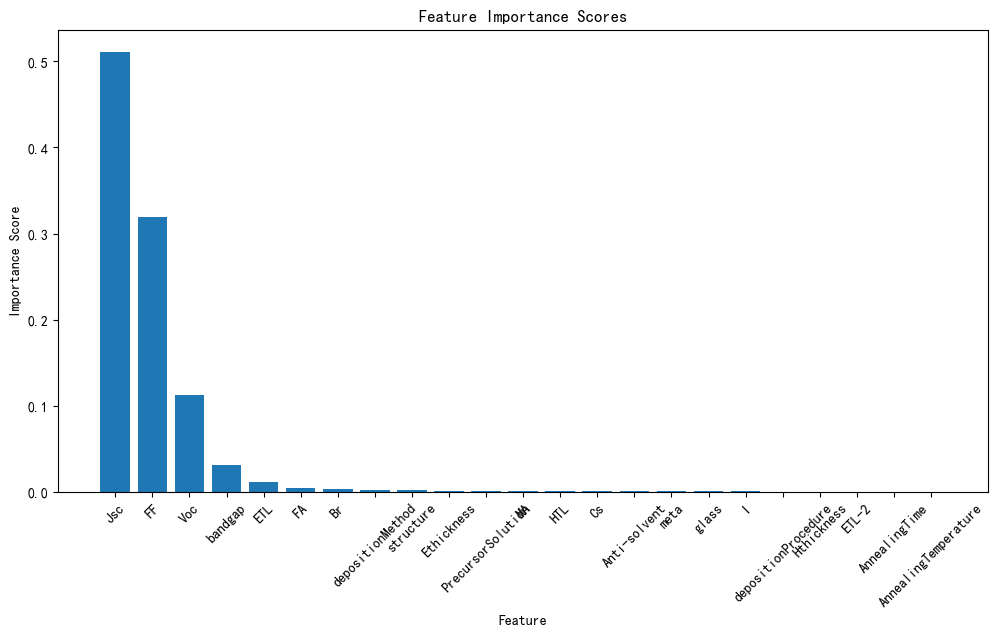

In [103]:
from sklearn.ensemble import GradientBoostingRegressor


data=pd.read_csv("Target_Encoding\df_encoded_PCE.csv")

X = data.drop('PCE', axis=1)
y = data['PCE']

gb = GradientBoostingRegressor()
gb.fit(X, y)

feature_importance_scores = gb.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_scores})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores')
plt.xticks(rotation=45)
plt.show()

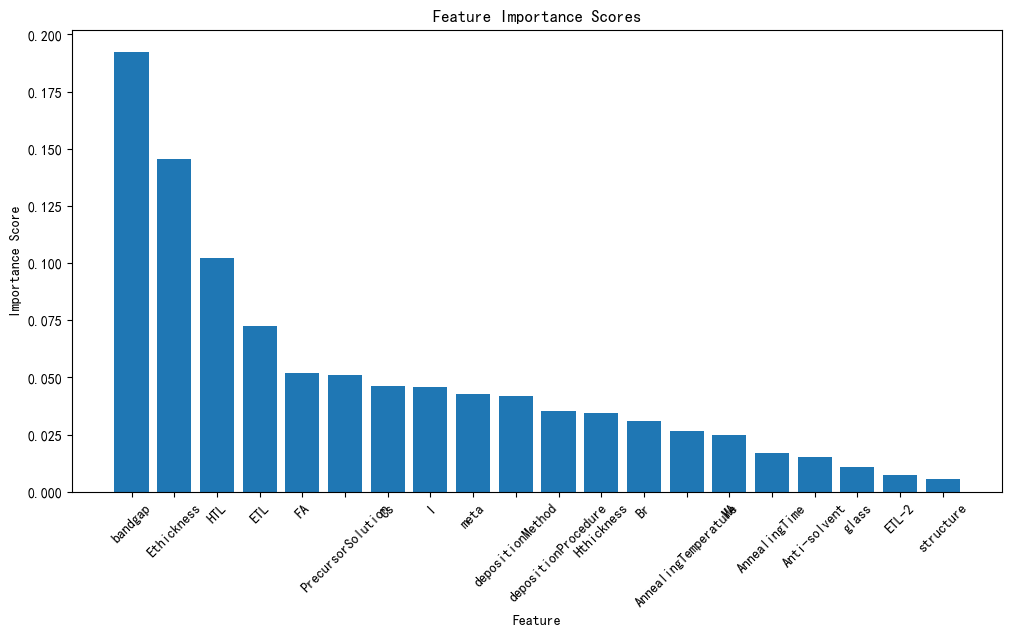

In [111]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("Target_Encoding\df_encoded_PCE.csv")
columns_to_drop = ['Jsc', 'Voc', 'FF','PCE']
X = data.drop(columns_to_drop, axis=1)
y = data['PCE']
rf = RandomForestRegressor()
rf.fit(X, y)
feature_importance_scores = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_scores})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores')
plt.xticks(rotation=45)
plt.show()

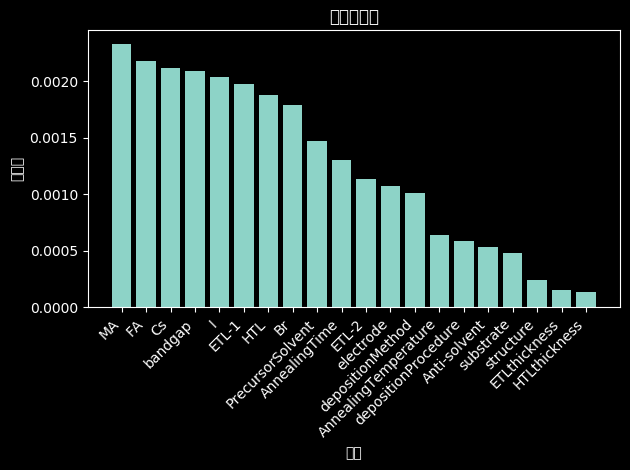

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 CSV 文件
data = pd.read_csv("feature_importances.csv")

# 获取特征名称和重要性值
features = data["Feature"]
importances = data["Importance"]

# 创建条形图
plt.bar(features, importances)
plt.xlabel("特征")
plt.ylabel("重要性")
plt.title("特征重要性")

# 旋转 x 轴标签以便更好地显示
plt.xticks(rotation=45, ha="right")

# 显示图形
plt.tight_layout()  # 避免标签重叠
plt.show()

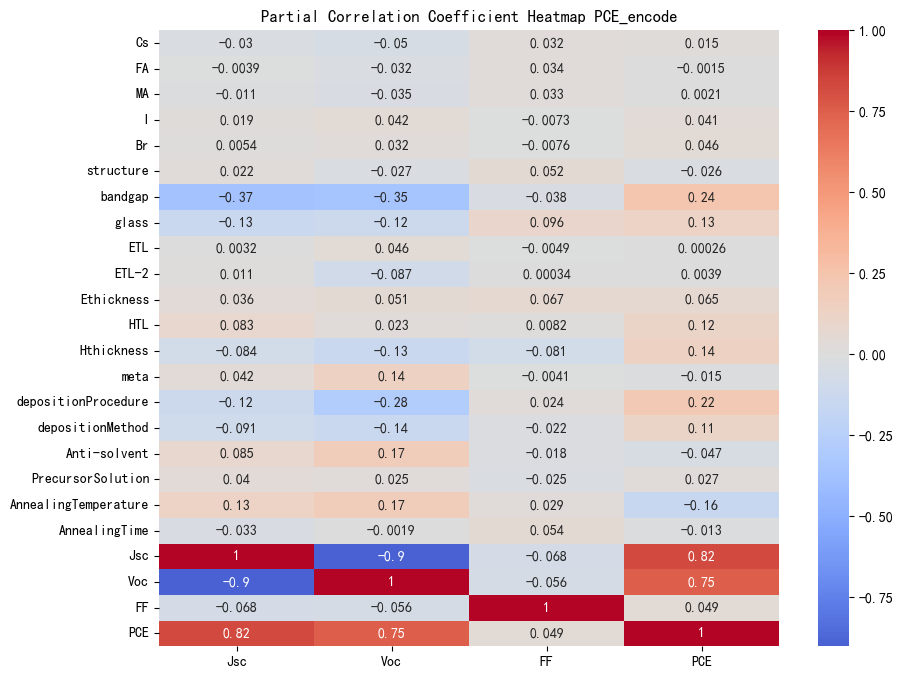

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False 
import pingouin as pg
df=pd.read_csv("Target_Encoding\df_encoded_PCE.csv")
df_pcorr = df.pcorr()
df_pcorr_last4 = df_pcorr.iloc[:, -4:]
plt.figure(figsize=(10, 8))
sns.heatmap(df_pcorr_last4, annot=True, cmap='coolwarm', center=0)
plt.title('Partial Correlation Coefficient Heatmap PCE_encode')
plt.show()

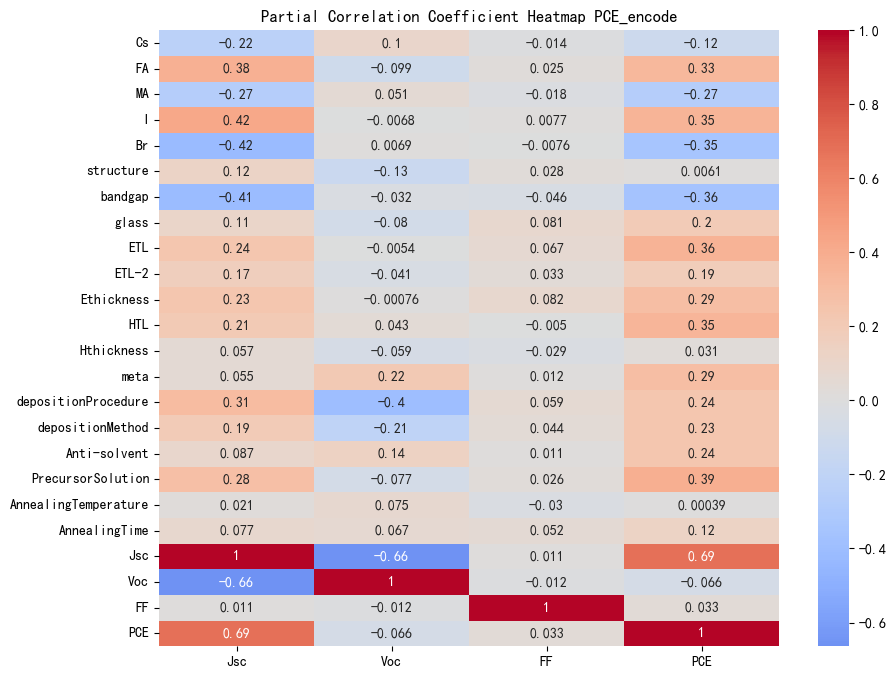

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  

df=pd.read_csv("Target_Encoding\df_encoded_PCE.csv")

df_pcorr = df.corr(method='pearson')
df_pcorr_last4 = df_pcorr.iloc[:, -4:]

plt.figure(figsize=(10, 8))
sns.heatmap(df_pcorr_last4, annot=True, cmap='coolwarm', center=0)
plt.title('Partial Correlation Coefficient Heatmap PCE_encode')
plt.show()

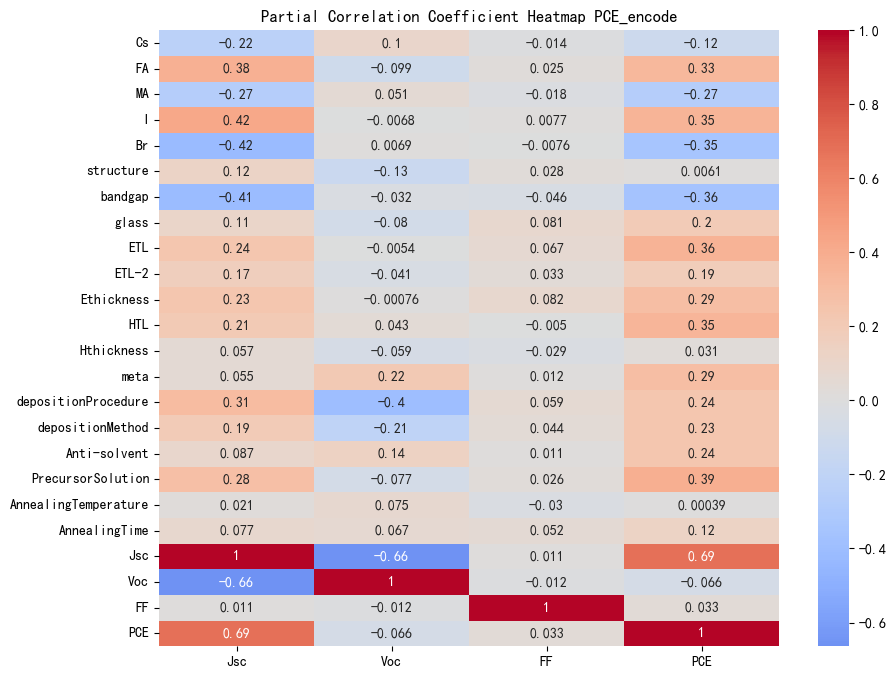

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  #
plt.rcParams['axes.unicode_minus'] = False  

df=pd.read_csv("Target_Encoding\df_encoded_Voc.csv")

df_pcorr = df.corr(method='pearson')
df_pcorr_last4 = df_pcorr.iloc[:, -4:]

plt.figure(figsize=(10, 8))
sns.heatmap(df_pcorr_last4, annot=True, cmap='coolwarm', center=0)
plt.title('Partial Correlation Coefficient Heatmap PCE_encode')
plt.show()

In [3]:
import pandas as pd
data=pd.read_csv("Target_Encoding\df_encoded_PCE.csv")

column1 = 'Voc'
column2 = 'bandgap'

correlation = data[column1].corr(data[column2], method='pearson')

print(f"Pearson correlation between {column1} and {column2}: {correlation}")

Pearson correlation between Voc and bandgap: -0.031828175446278084


In [5]:
import pandas as pd
import pingouin as pg

data = pd.read_csv("Target_Encoding\df_encoded_PCE.csv")

column1 = 'Voc'
column2 = 'bandgap'
partial_corr = pg.partial_corr(data, x=column1, y=column2)

print(f"Partial correlation between {column1} and {column2}: {partial_corr['r']}")

Partial correlation between Voc and bandgap: pearson   -0.031828
Name: r, dtype: float64


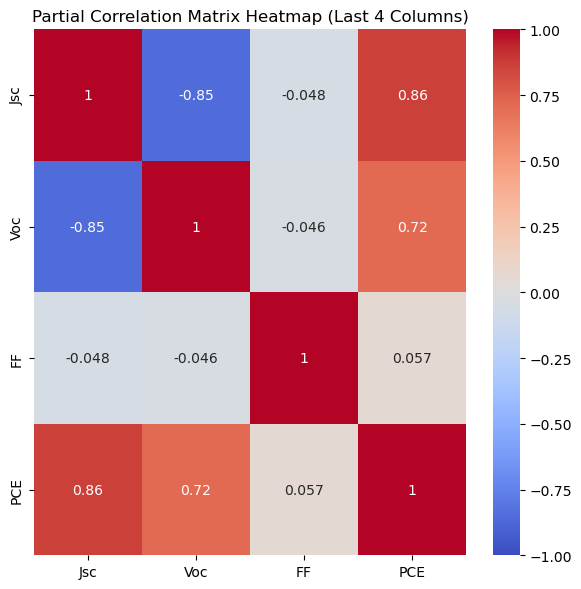

In [9]:
import pandas as pd
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Target_Encoding\df_encoded_PCE.csv")

last_4_columns = df.columns[-4:]
df_last_4 = df[last_4_columns]

pcorr_matrix_last_4 = pg.pcorr(df_last_4).round(3)

plt.figure(figsize=(6, 6))
sns.heatmap(pcorr_matrix_last_4, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            xticklabels=last_4_columns, yticklabels=last_4_columns)
plt.title('Partial Correlation Matrix Heatmap (Last 4 Columns)')
plt.tight_layout()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10280\2993325432.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_pcorr = df3.corr(method='pearson')


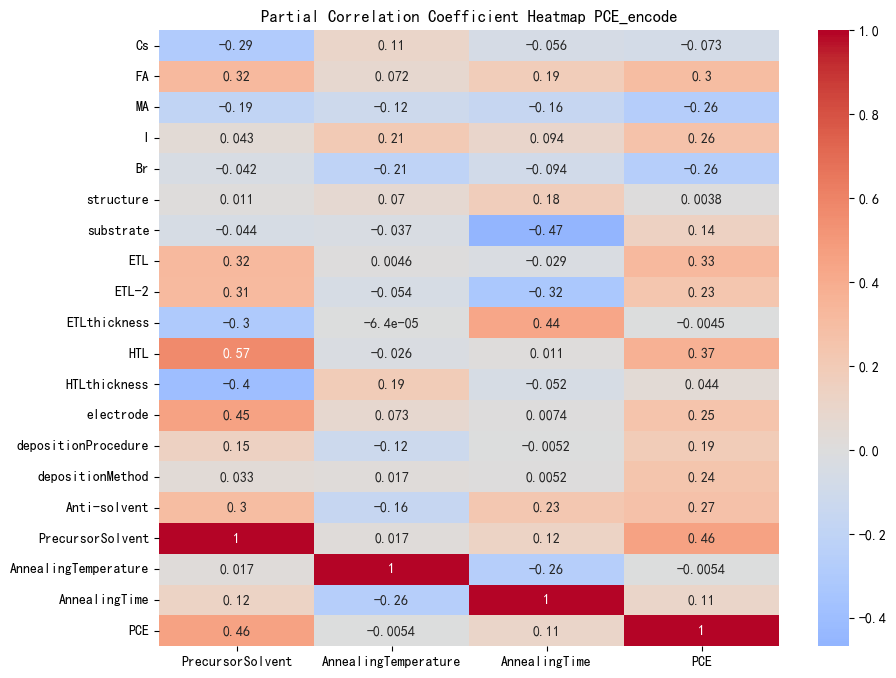

In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  

df3=pd.read_csv("without_fill/encoded_PCE.csv")

df_pcorr = df3.corr(method='pearson')
df_pcorr_last4 = df_pcorr.iloc[:, -4:]

plt.figure(figsize=(10, 8))
sns.heatmap(df_pcorr_last4, annot=True, cmap='coolwarm', center=0)
plt.title('Partial Correlation Coefficient Heatmap PCE_encode')
plt.show()

In [12]:


df3=pd.read_csv("without_fill/encoded_PCE.csv")

df3.to_excel("without_fill/encoded_PCE.xlsx",index=False)

In [29]:
import pandas as pd

df = pd.read_excel("without_fill/encoded_PCE.xlsx")

corr_matrix = df.corr()

print(corr_matrix)

                            Cs        FA        MA         I        Br  \
Cs                    1.000000 -0.193433 -0.265334  0.061463 -0.061460   
FA                   -0.193433  1.000000 -0.894179  0.141612 -0.138963   
MA                   -0.265334 -0.894179  1.000000 -0.166829  0.164221   
I                     0.061463  0.141612 -0.166829  1.000000 -0.999547   
Br                   -0.061460 -0.138963  0.164221 -0.999547  1.000000   
structure            -0.178045  0.150175 -0.066815 -0.049768  0.049854   
bandgap               0.014192 -0.135210  0.126974 -0.719002  0.717982   
substrate             0.054988 -0.005708 -0.020938  0.085283 -0.083241   
ETL                  -0.121706  0.257721 -0.198181  0.055541 -0.057815   
ETL-2                 0.112907  0.093624 -0.126500  0.156667 -0.156228   
ETLthickness          0.034284  0.211177 -0.197782 -0.296966  0.296931   
HTL                  -0.135816  0.262800 -0.196887 -0.120713  0.121223   
HTLthickness         -0.099299 -0.2509

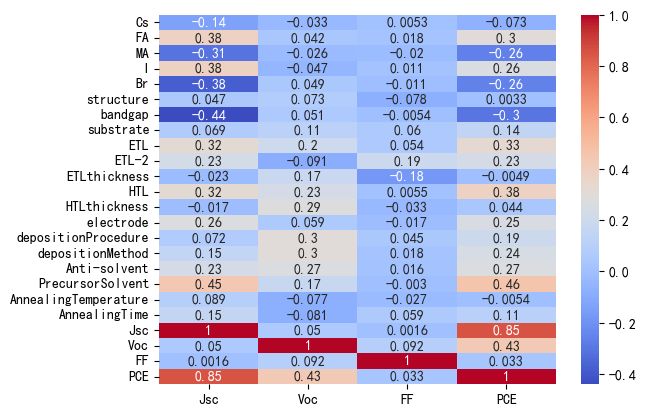

In [34]:
corr1=corr_matrix[-4:]
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


corr1_transposed = corr1.T

sns.heatmap(corr1_transposed, annot=True, cmap='coolwarm')
plt.show()

In [27]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_excel('without_fill/encoded_PCE.xlsx')

data_clean = data.dropna(subset=['bandgap', 'Voc'])
corr, p_value = stats.pearsonr(data_clean['bandgap'], data_clean['Voc'])
print(f"Partial correlation coefficient between ETL and PCE: {corr:.4f}")
print(f"P-value: {p_value:.4f}")

Partial correlation coefficient between ETL and PCE: 0.0507
P-value: 0.2869


In [25]:
data = pd.read_excel('without_fill/encoded_PCE.xlsx')
data = data.dropna(subset=['FF'])
data = data.dropna(subset=['Jsc'])

data['Jsc'] = data['Jsc'].astype('float64')

data['Voc'] = data['Voc'].astype('float64')

data['FF'] = data['FF'].astype('float64')
data['bandgap'] = data['bandgap'].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 0 to 459
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cs                    454 non-null    float64
 1   FA                    454 non-null    float64
 2   MA                    454 non-null    float64
 3   I                     454 non-null    float64
 4   Br                    454 non-null    float64
 5   structure             454 non-null    float64
 6   bandgap               443 non-null    float64
 7   substrate             441 non-null    float64
 8   ETL                   441 non-null    float64
 9   ETL-2                 229 non-null    float64
 10  ETLthickness          39 non-null     float64
 11  HTL                   429 non-null    float64
 12  HTLthickness          33 non-null     float64
 13  electrode             440 non-null    float64
 14  depositionProcedure   426 non-null    float64
 15  depositionMethod      4

In [26]:
data.to_excel('without_fill/encoded_PCE.xlsx',index=False)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10280\485883536.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_pcorr = df3.corr(method='pearson')


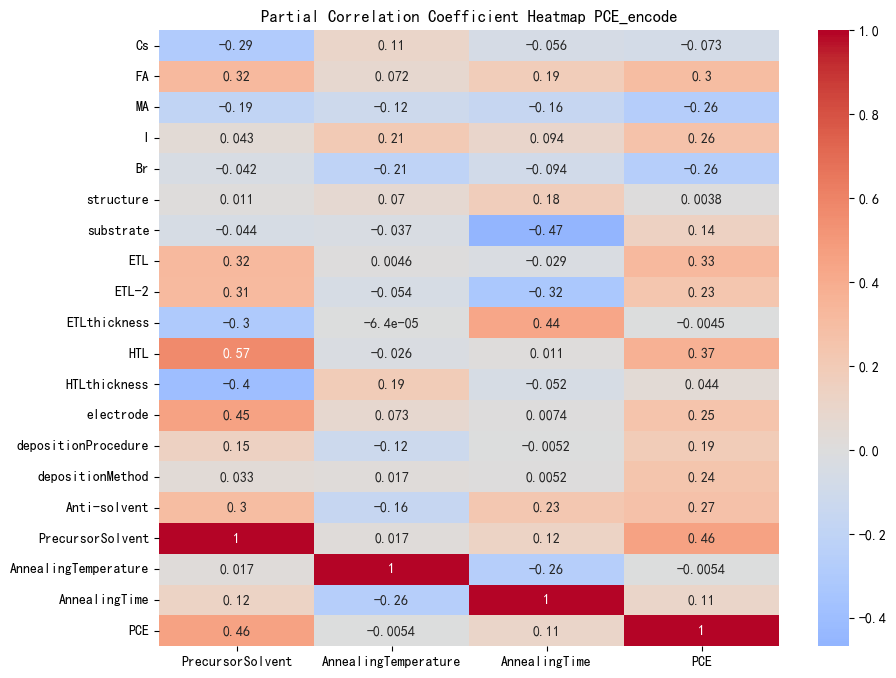

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  

df3=pd.read_csv("without_fill/encoded_PCE.csv")

df_pcorr = df3.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(df_pcorr_last4, annot=True, cmap='coolwarm', center=0)
plt.title('Partial Correlation Coefficient Heatmap PCE_encode')
plt.show()